# Basit Doğrusal Regresyon - Model Tuning - Model Doğrulama

### Şirket, işçilerin deneyimlerine ve maaşlarına dair bir veri seti oluşturdu. Bu veri setinde, işçilerin deneyimleri ve aldıkları maaşlar yer almaktadır.

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [102]:
# veri setini oluşturalım.
deneyim = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
maas = [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

data = pd.DataFrame({'deneyim':deneyim, 'maas':maas})
data.head()

,deneyim,maas
0,1,3000
1,2,4000
2,3,5000
3,4,6000
4,5,7000


# Veri Ön İşleme

In [103]:
# eksik gözlem analizi

data.isnull().sum()

deneyim    0
maas       0
dtype: int64

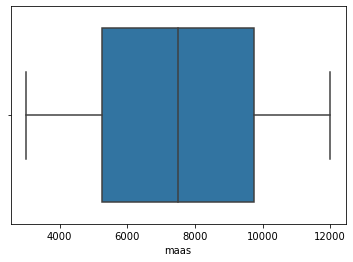

In [104]:
# aykırı gözlem analizi

sns.boxplot(data=data, x='maas');

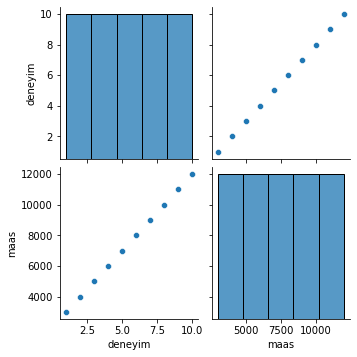

In [105]:
# değişkenler arasındaki korelasyonun gözlenmesi

sns.pairplot(data=data);

# Hipotez Testi

#### Şimdi, maaşların deneyimle nasıl ilişkili olduğunu test etmek için bir hipotez testi yapabiliriz. İlk olarak, hipotezlerimizi belirleyelim:

#### • H0: Maaşlar deneyimle ilişkisizdir (β1 = 0)
#### • H1: Maaşlar deneyimle ilişkilidir (β1 ≠ 0)
#### Burada, β1, maaşlar ve deneyim arasındaki katsayıdır. Hipotez testi için p-değeri kullanacağız. P-değeri, hipotezimizin doğru olma olasılığını gösterir. P-değeri 0.05'ten küçükse, hipotezimizi reddederiz.

In [106]:
# bağımlı ve bağımsız değişkenlerimizi oluşturalım.
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [107]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:, 0], y)
print('Slope: ', slope)
print('Intercept: ', intercept)
print('R-squared: ', r_value)
print('P-value: ', p_value)
print('Hata: ', std_err)

Slope:  1000.0
Intercept:  2000.0
R-squared:  1.0
P-value:  4.375000000000076e-80
Hata:  0.0


#### P-value değeri 0.05 'den küçük olduğu için H0 hipotezimizi reddediyoruz. Yani, maaşlar deneyimle ilişkilidir.

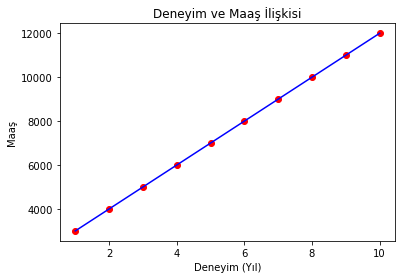

In [108]:
plt.scatter(X[:, 0], y, color='red')
plt.plot(X[:, 0], slope * X[:,0] + intercept, color='blue')
plt.title('Deneyim ve Maaş İlişkisi')
plt.xlabel('Deneyim (Yıl)')
plt.ylabel('Maaş')
plt.show()

# Model Tuning ve Model Doğrulama

In [109]:
# eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
# modeli oluşturalım ve eğitelim.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
# Tahmin
y_pred = model.predict(X_test)

In [112]:
# R-kare ve MSE değerleri

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-kare değeri: ', r2)
print('MSE değeri: ', mse)

R-kare değeri:  1.0
MSE değeri:  0.0


# Sonuç

### Veri setimizin kolay olmuş olması, fazla detaya inmeden maksimum verimliliği almamızı sağladı. R-kare değerimiz, olabilecek en iyi değer. MSE hata değerimiz de öyle. Gerçek hayatta karşılaşacağımız veriler bu kadar kolay olmayacaktır. Fakat, gerçek hayatta zor bir veri seti ile karşılaştığımızda uygulayacağımız adımlar üstün körü yukarıdaki gibidir.

In [113]:
print('Makine Öğrenmesi Uygulamasına Hoş Geldiniz!\nGirdi olarak deneyimizi girdiğinizde aldığınız veya alabileceğiniz maaşı tahmin eden bir yapay zeka.')

user_input = input('Lütfen bulunduğunuz kurumdaki deneyimizi giriniz: ')
model = model.predict([[int(user_input)]])
print(f'{user_input} senelik deneyiminiz göz önünde bulunarak tahmini kazancınız: {(model[0]):.2f} TL "dir.')

Makine Öğrenmesi Uygulamasına Hoş Geldiniz!
Girdi olarak deneyimizi girdiğinizde aldığınız veya alabileceğiniz maaşı tahmin eden bir yapay zeka.


Lütfen bulunduğunuz kurumdaki deneyimizi giriniz:  22


22 senelik deneyiminiz göz önünde bulunarak tahmini kazancınız: 24000.00 TL "dir.
